In [1]:
from textblob import TextBlob
import sys,tweepy
import matplotlib.pyplot as plt

enter hashtag :bitcoin
How many tweets to analyze 50
neutral 56.00


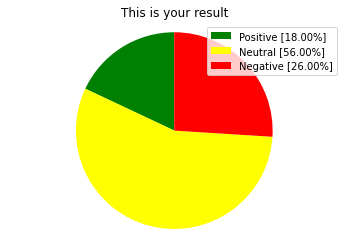

In [2]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

consumerKey="uXKx5jLDhHmcKpA1C7by62XV6"
consumerSecret= "MegtLtYaPBdvRazgUgx4vAz7fHAKSdWFY8POmY77sKEKCZkAlc"
accessToken= "1433844380247363587-aU6UfdJb5HbEMxXq74FHx2iswjepqD"
accessTokenSecret = "pQJ44YMWha6zZYRsT0iWEXXkoRw01zthAgfdy90m78lEj"

auth = tweepy.OAuthHandler(consumer_key=consumerKey, consumer_secret=consumerSecret)
auth.set_access_token(accessToken,accessTokenSecret)
api = tweepy.API(auth)

searchTerm = input("enter hashtag :")
number = int(input("How many tweets to analyze "))

tweets = tweepy.Cursor(api.search , q=searchTerm).items(number)

pos=0
neg=0
neutral=0
polarity=0

for tweet in tweets:
    #print(tweet.text)
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity

    if(analysis.sentiment.polarity == 0):
        neutral += 1
    elif(analysis.sentiment.polarity < 0.00):
        neg += 1
    elif(analysis.sentiment.polarity > 0.00):
        pos += 1
pos = percentage(pos,number)
neg = percentage(neg,number)
neutral = percentage(neutral,number)
polarity = percentage(polarity,number)

pos= format(pos, '.2f')
neg = format(neg, '.2f')
neutral= format(neutral, '.2f')

max1 = max(pos,neg,neutral)
if(max1==pos):
    print("positve "+max1)
elif(max1==neg):
    print("negative "+max1)
elif(max1==neutral):
    print("neutral "+max1)

labels = ['Positive ['+ str(pos) +'%]','Neutral ['+ str(neutral) +'%]','Negative ['+ str(neg) +'%]']
sizes=[pos,neutral,neg]
colors = ['green','yellow','red']
patches,texts= plt.pie(sizes,colors=colors,startangle=90)
plt.legend(patches,labels,loc="best")
plt.title("This is your result")
plt.axis('equal')
plt.show()
